In [1]:
import tensorflow as tf
from tensorflow.keras.applications import (
    ResNet50, VGG16, MobileNetV2, InceptionV3, DenseNet121, Xception, NASNetMobile
)
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Define a function to load and modify a pretrained model
def load_model(name: str, num_classes: int, input_shape=(128, 128, 3)) -> Model:
    base_model = None

    if name == "resnet50":
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif name == "vgg16":
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif name == "mobilenet_v2":
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif name == "inception_v3":
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    
    else:
        raise ValueError(f"Model {name} not supported.")

    # Add custom layers on top of the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the full model
    model = Model(inputs=base_model.input, outputs=predictions)

    return model

# Example usage
input_shape = (128, 128, 3)
num_classes = 5  # Adjust according to your dataset

model = load_model("resnet50", num_classes, input_shape)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


2024-06-21 18:18:22.316620: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-21 18:18:22.346312: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 18:18:22.346332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 18:18:22.346997: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 18:18:22.351764: I tensorflow/core/platform/cpu_feature_guar

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                         

In [2]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
hdf5_file_path = 'subset_dataset.h5'

with h5py.File(hdf5_file_path, 'r') as hdf5_file:
    images = hdf5_file['images'][:]
    labels = hdf5_file['labels'][:]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Save the splits
def save_hdf5(data, labels, filename):
    with h5py.File(filename, 'w') as hdf5_file:
        hdf5_file.create_dataset('images', data=data, compression='gzip')
        hdf5_file.create_dataset('labels', data=labels, compression='gzip')

save_hdf5(X_train, y_train, 'train_dataset.h5')
save_hdf5(X_val, y_val, 'val_dataset.h5')
save_hdf5(X_test, y_test, 'test_dataset.h5')


Training model: resnet50
Epoch 1/20


2024-06-21 18:30:51.373467: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-06-21 18:30:52.892282: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe09c340790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-21 18:30:52.892310: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-06-21 18:30:52.892313: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-06-21 18:30:52.896568: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1719019852.965863   81073 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


242/242 [==============================] - ETA: 0s - loss: 0.3663 - accuracy: 0.8656

/home/researchgroup/miniconda3/envs/newtest/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


242/242 [==============================] - 11s 30ms/step - loss: 0.3663 - accuracy: 0.8656 - val_loss: 0.1425 - val_accuracy: 0.9674
Epoch 2/20
242/242 [==============================] - 5s 22ms/step - loss: 0.1669 - accuracy: 0.9569 - val_loss: 0.1197 - val_accuracy: 0.9697
Epoch 3/20
242/242 [==============================] - 5s 22ms/step - loss: 0.1546 - accuracy: 0.9595 - val_loss: 0.1092 - val_accuracy: 0.9709
Epoch 4/20
242/242 [==============================] - 5s 22ms/step - loss: 0.1369 - accuracy: 0.9644 - val_loss: 0.1029 - val_accuracy: 0.9732
Epoch 5/20
242/242 [==============================] - 5s 20ms/step - loss: 0.1325 - accuracy: 0.9645 - val_loss: 0.1230 - val_accuracy: 0.9616
Epoch 6/20
242/242 [==============================] - 5s 21ms/step - loss: 0.1307 - accuracy: 0.9648 - val_loss: 0.0970 - val_accuracy: 0.9721
Epoch 7/20
242/242 [==============================] - 5s 20ms/step - loss: 0.1255 - accuracy: 0.9671 - val_loss: 0.1006 - val_accuracy: 0.9744
Epoch 8/2

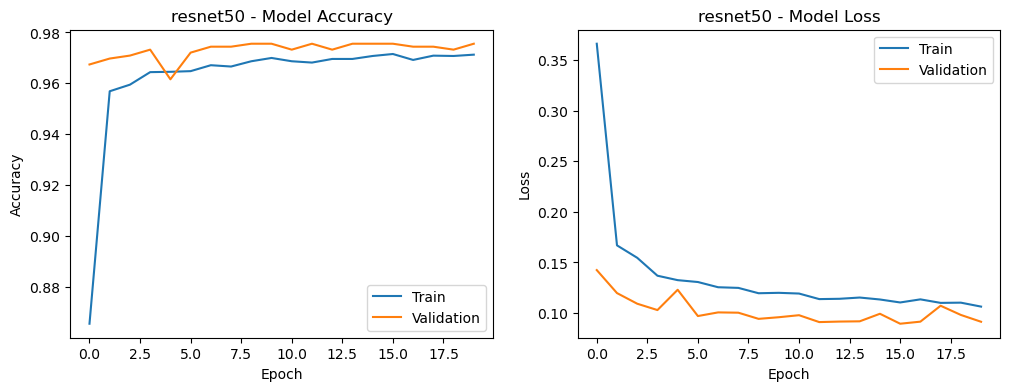

Training model: vgg16
Epoch 1/20
242/242 [==============================] - 7s 26ms/step - loss: 0.2097 - accuracy: 0.9364 - val_loss: 0.1052 - val_accuracy: 0.9767
Epoch 2/20
242/242 [==============================] - 5s 22ms/step - loss: 0.1210 - accuracy: 0.9678 - val_loss: 0.0907 - val_accuracy: 0.9767
Epoch 3/20
242/242 [==============================] - 5s 22ms/step - loss: 0.1128 - accuracy: 0.9697 - val_loss: 0.0864 - val_accuracy: 0.9767
Epoch 4/20
242/242 [==============================] - 5s 22ms/step - loss: 0.1121 - accuracy: 0.9709 - val_loss: 0.1136 - val_accuracy: 0.9732
Epoch 5/20
242/242 [==============================] - 5s 22ms/step - loss: 0.1047 - accuracy: 0.9726 - val_loss: 0.0868 - val_accuracy: 0.9767
Epoch 6/20
242/242 [==============================] - 5s 22ms/step - loss: 0.1003 - accuracy: 0.9731 - val_loss: 0.0917 - val_accuracy: 0.9767
Epoch 7/20
242/242 [==============================] - 5s 23ms/step - loss: 0.0996 - accuracy: 0.9729 - val_loss: 0.0839 

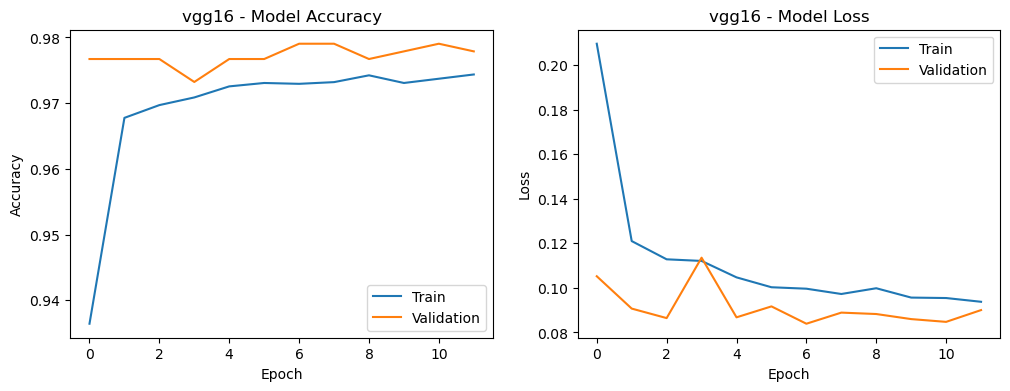

Training model: mobilenet_v2
Epoch 1/20
242/242 [==============================] - 7s 19ms/step - loss: 0.2262 - accuracy: 0.9394 - val_loss: 0.0873 - val_accuracy: 0.9814
Epoch 2/20
242/242 [==============================] - 4s 15ms/step - loss: 0.1290 - accuracy: 0.9649 - val_loss: 0.0828 - val_accuracy: 0.9790
Epoch 3/20
242/242 [==============================] - 4s 14ms/step - loss: 0.1195 - accuracy: 0.9683 - val_loss: 0.0960 - val_accuracy: 0.9814
Epoch 4/20
242/242 [==============================] - 3s 14ms/step - loss: 0.1158 - accuracy: 0.9683 - val_loss: 0.0871 - val_accuracy: 0.9779
Epoch 5/20
242/242 [==============================] - 4s 14ms/step - loss: 0.1032 - accuracy: 0.9741 - val_loss: 0.0931 - val_accuracy: 0.9779
Epoch 6/20
242/242 [==============================] - 4s 14ms/step - loss: 0.1019 - accuracy: 0.9716 - val_loss: 0.0880 - val_accuracy: 0.9802
Epoch 7/20
68/68 [==============================] - 1s 12ms/step - loss: 0.1283 - accuracy: 0.9655
mobilenet_v2 -

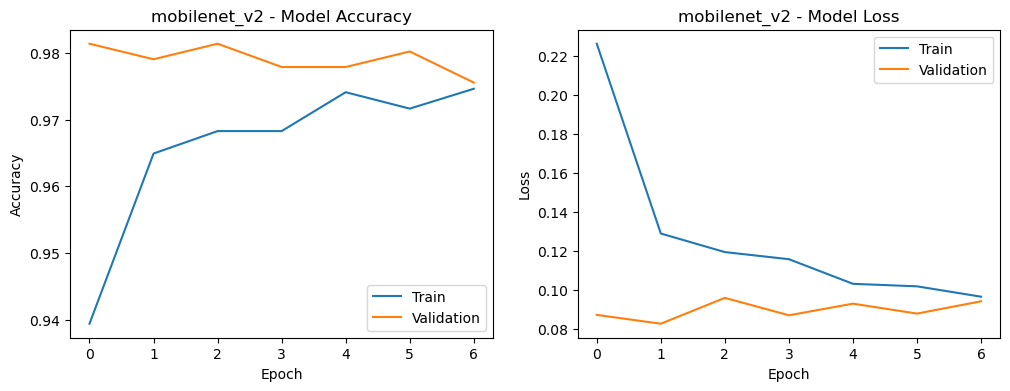

Training model: inception_v3
Epoch 1/20
242/242 [==============================] - 13s 36ms/step - loss: 0.4351 - accuracy: 0.9305 - val_loss: 0.1269 - val_accuracy: 0.9581
Epoch 2/20
242/242 [==============================] - 6s 23ms/step - loss: 0.1504 - accuracy: 0.9588 - val_loss: 0.1078 - val_accuracy: 0.9709
Epoch 3/20
242/242 [==============================] - 6s 23ms/step - loss: 0.1462 - accuracy: 0.9612 - val_loss: 0.1011 - val_accuracy: 0.9721
Epoch 4/20
242/242 [==============================] - 5s 21ms/step - loss: 0.1327 - accuracy: 0.9653 - val_loss: 0.1073 - val_accuracy: 0.9721
Epoch 5/20
242/242 [==============================] - 5s 21ms/step - loss: 0.1280 - accuracy: 0.9661 - val_loss: 0.1047 - val_accuracy: 0.9744
Epoch 6/20
242/242 [==============================] - 5s 21ms/step - loss: 0.1221 - accuracy: 0.9675 - val_loss: 0.1080 - val_accuracy: 0.9709
Epoch 7/20
242/242 [==============================] - 5s 21ms/step - loss: 0.1203 - accuracy: 0.9658 - val_loss:

In [4]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV2, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.models import Model

def build_pretrained_model(base_model, num_classes):
    base_model.trainable = False  # Freeze the base model layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=outputs)
    return model

def load_data(hdf5_file_path):
    with h5py.File(hdf5_file_path, 'r') as hdf5_file:
        images = hdf5_file['images'][:]
        labels = hdf5_file['labels'][:]
    return images, labels

# Load data
X_train, y_train = load_data('train_dataset.h5')
X_val, y_val = load_data('val_dataset.h5')
X_test, y_test = load_data('test_dataset.h5')

# Define models
pretrained_models = {
    'resnet50': ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3))),
    'vgg16': VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3))),
    'mobilenet_v2': MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3))),
    'inception_v3': InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))
}

num_classes = 5  # Replace with the actual number of classes in your dataset

# Iterate over each model, train and save
for model_name, base_model in pretrained_models.items():
    print(f'Training model: {model_name}')
    
    model = build_pretrained_model(base_model, num_classes)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_{model_name}.h5', monitor='val_loss', save_best_only=True)
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        callbacks=[early_stopping, model_checkpoint]
    )
    
    # Load the best weights
    model.load_weights(f'best_model_{model_name}.h5')
    
    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'{model_name} - Test loss: {test_loss:.4f}')
    print(f'{model_name} - Test accuracy: {test_accuracy:.4f}')
    
    # Save the full model
    model.save(f'final_model_{model_name}.h5')
    
    # Plot training and validation accuracy and loss
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{model_name} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{model_name} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
